/tmp/ipykernel_57122/3148349267.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary_df['Year'], y=summary_df['Fire Count'], palette='viridis')


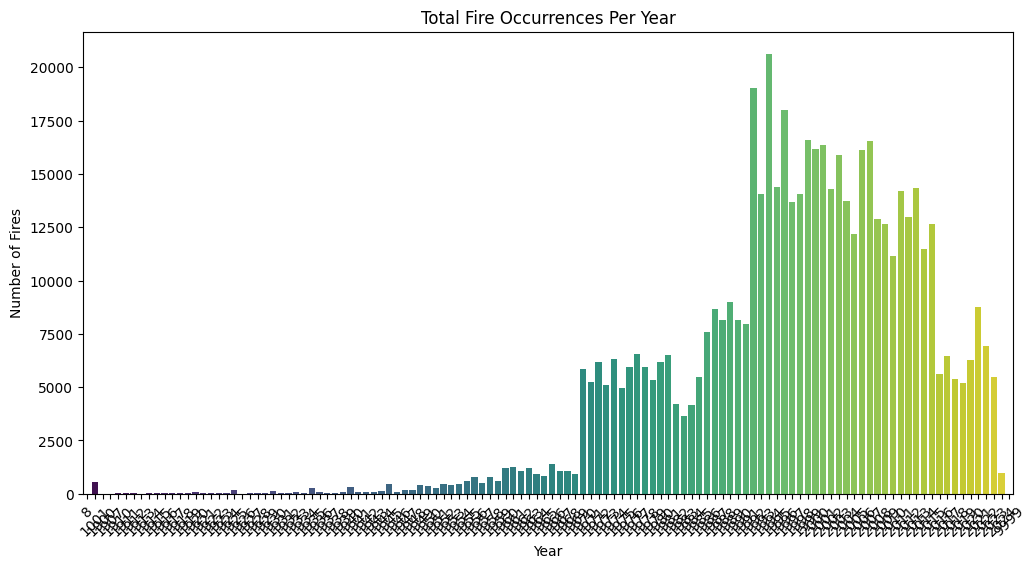

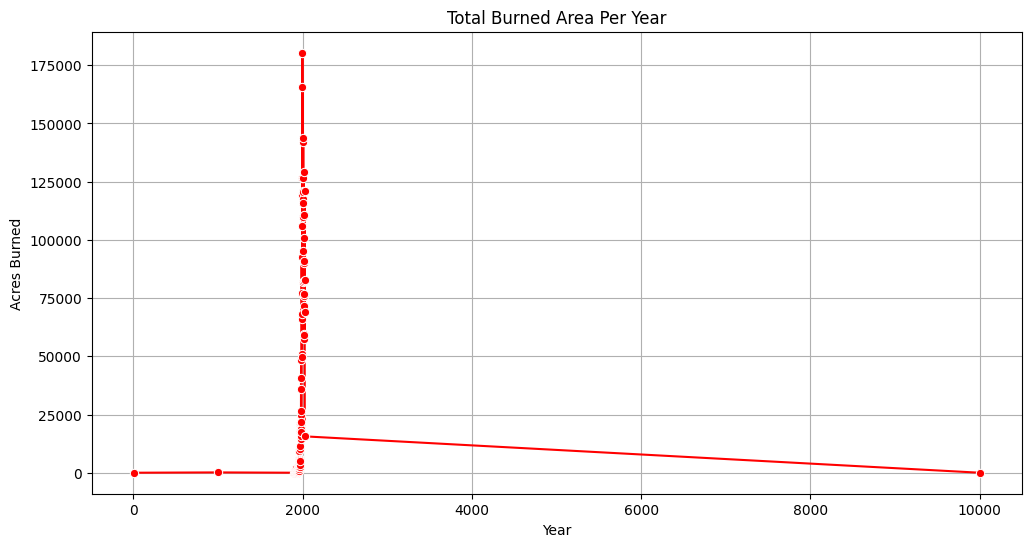

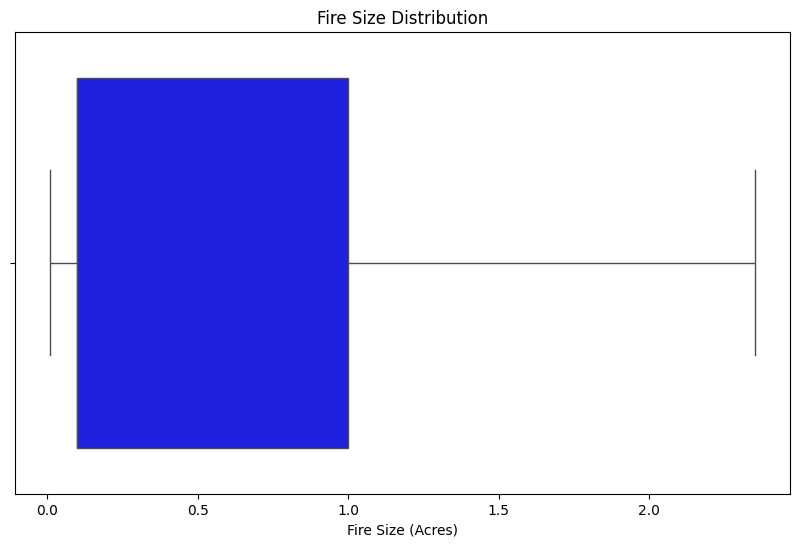

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/home/pranav/nighthawk/Pranav_2025/Pranav_2025/assets/data/National_USFS_Fire_Occurrence_Point_(Feature_Layer).csv"
df = pd.read_csv(file_path, low_memory=False)

# Drop problematic columns (hardcoded column names due to dtype warning)
drop_columns = ['column_name_5', 'column_name_11', 'column_name_12', 'column_name_13', 'column_name_18', 'column_name_19']
df = df.drop(columns=[col for col in drop_columns if col in df.columns])

# Rename columns for clarity
df.rename(columns={'TOTALACRES': 'fire_size'}, inplace=True)

# Remove unrealistic fire sizes (e.g., negative values, extreme outliers)
if 'fire_size' in df.columns:
    df = df[df['fire_size'] > 0]  # Remove negative or zero fire sizes
    df = df[df['fire_size'] < df['fire_size'].quantile(0.99)]  # Remove extreme outliers

# Convert FIREYEAR to integer
df['FIREYEAR'] = df['FIREYEAR'].fillna(0).astype(int)

# Create a summary DataFrame
summary_df = df.groupby('FIREYEAR')['fire_size'].agg(['count', 'mean', 'sum']).reset_index()
summary_df.columns = ['Year', 'Fire Count', 'Avg Fire Size', 'Total Burned Area']

# Display the first few rows
summary_df.head()

# Plot Fire Count Over Years
plt.figure(figsize=(12, 6))
sns.barplot(x=summary_df['Year'], y=summary_df['Fire Count'], palette='viridis')
plt.title("Total Fire Occurrences Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Fires")
plt.xticks(rotation=45)
plt.show()

# Plot Total Burned Area Over Years
plt.figure(figsize=(12, 6))
sns.lineplot(x=summary_df['Year'], y=summary_df['Total Burned Area'], marker='o', color='red')
plt.title("Total Burned Area Per Year")
plt.xlabel("Year")
plt.ylabel("Acres Burned")
plt.grid()
plt.show()

# Fire Size Distribution Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['fire_size'], showfliers=False, color='blue')
plt.title("Fire Size Distribution")
plt.xlabel("Fire Size (Acres)")
plt.show()
